In [15]:
from lightexperiments.light import Light
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sbn
from lasagne.misc import plot_weights

%matplotlib inline
light = Light()
light.launch()

d = light.db.find({"tags": ["variational_autoencoder_example", "save_samples", "random_search"]})
documents = list(d)
light.close()

In [16]:
import pandas as pd
cols_names = [  'z_dim', 'hidden', 'nb_layers', 'learning_rate', 'loss_train_final', 'duration', 
        'max_epochs', 'batch_size',
        'batch_normalization',
              ''
        'sec/epoch']
cols_values = [
    'z_dim', 'hidden', 'nb_layers', 'learning_rate', lambda d:d["loss_train"][-1], 'duration', 
    'max_epochs', 'batch_size',
    'batch_normalization',
    lambda d:(d['duration']/(d['max_epochs']))
]
    
df = pd.DataFrame(columns=cols_names)
for name, col in zip(cols_names, cols_values):
    if type(col) == str:
        df[name] = [d[col] for d in documents]
    elif callable(col):
        df[name] = [col(d) for d in documents]
        
#df = df.sort('loss_train_final')
print(df["loss_train_final"].argmin())
df[0:50]

14


,z_dim,hidden,nb_layers,learning_rate,loss_train_final,duration,max_epochs,batch_size,batch_normalization,sec/epoch
0,20,530,3,0.000054,101.797844,358.221782,300,256,False,1.194073
1,5,546,3,0.000775,105.503403,198.164303,300,256,False,0.660548
2,10,720,2,0.000209,97.070831,291.680071,300,256,False,0.972267
3,100,743,1,0.000222,100.909172,168.354217,300,256,False,0.561181
4,20,739,1,0.000071,103.427673,203.014331,300,256,False,0.676714
5,5,784,3,0.000017,122.557518,412.114481,300,256,False,1.373715
6,160,621,1,0.000922,100.408752,164.821176,300,256,False,0.549404
7,80,164,2,0.000029,111.856735,351.737678,300,256,False,1.172459
8,20,591,2,0.000520,95.774971,188.015571,300,256,False,0.626719
9,30,449,3,0.000289,96.910507,264.262018,300,256,False,0.880873


In [5]:
# best model samples
id_min = df["loss_train_final"].argmin()
d = documents[id_min]
samples = []
for sample in d["samples"]:
    samples.append(
        np.array(light.db_blobs.find_one({"_id": sample}).get("content"))
    )

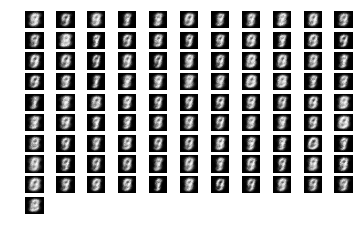

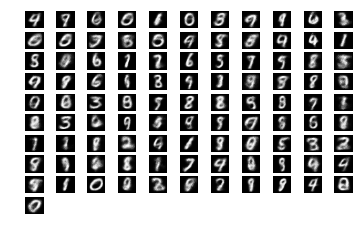

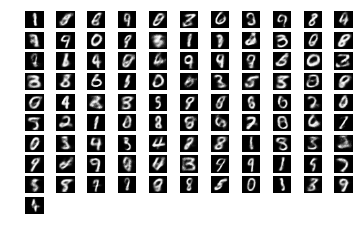

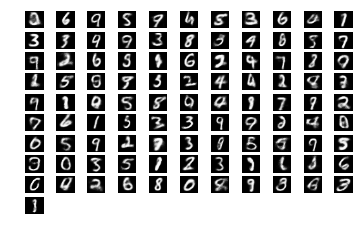

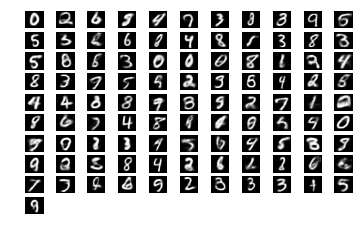

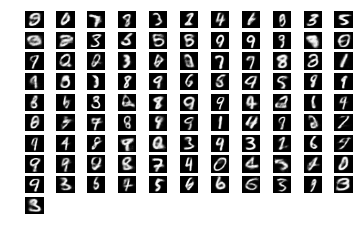

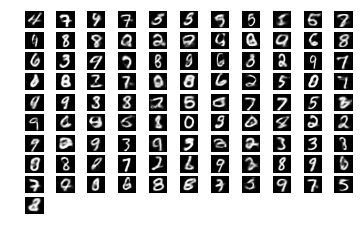

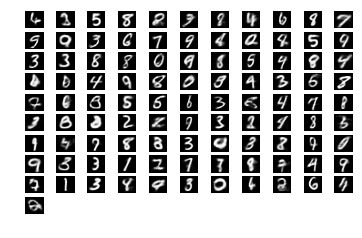

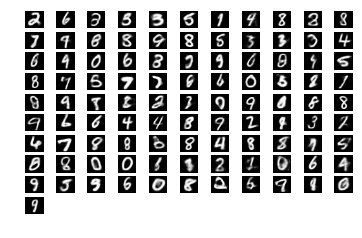

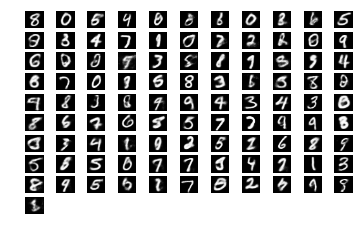

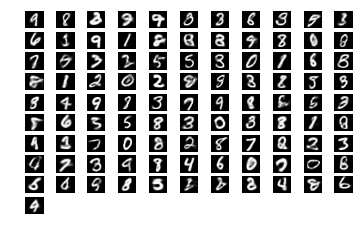

KeyboardInterrupt: 

In [6]:
for sample in samples:
    plt.clf()
    plot_weights.grid_plot(1 - sample)
    plt.show()

In [6]:
# all last samples from all models
samples_all = []
#sorted(documents, key=lambda d:d["loss_train"][-1])
D = documents
for d in D:
    print(d["_id"])
    sample = d["samples"][-1]
    samples_all.append(
        np.array(light.db_blobs.find_one({"_id": sample}).get("content"))
    )

557041edc7b09a167d25994f
55704932c7b09a1ea6213595
55704a6ac7b09a1faaf0124e
55704b24c7b09a21347bf72a
55704c01c7b09a220c95391c
55704dafc7b09a2358430a1e
55704e66c7b09a2549e75f32
55704fd7c7b09a263256db81
557050a4c7b09a286d29912c
557051c0c7b09a2a9a08cb92
557052f4c7b09a2d0b82b949
557053ddc7b09a2f572a0d74
557055d6c7b09a3094019223
557056e7c7b09a34ebb21423
55705861c7b09a3664956526
557059fcc7b09a395372e3b7
55705ab1c7b09a3b6f517eea
55705ba9c7b09a3c4c4b1d25
55705cbec7b09a3d703816c3
55705df5c7b09a3eb70643d8
55705ecfc7b09a404d092086


id:0


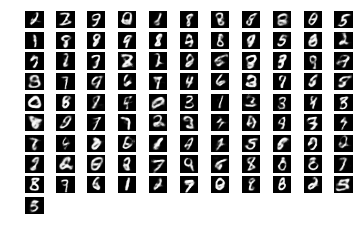

id:1


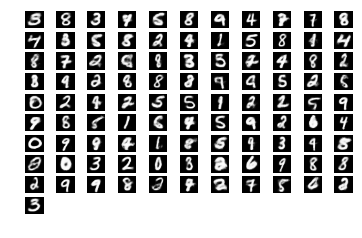

id:2


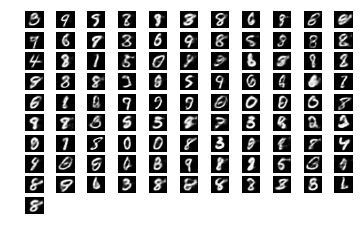

id:3


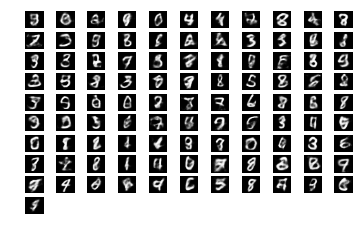

id:4


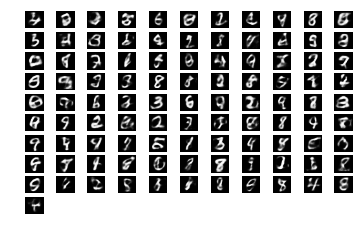

id:5


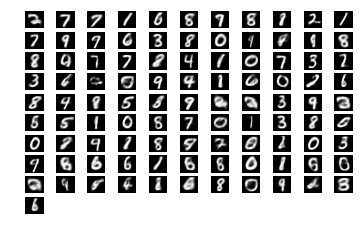

id:6


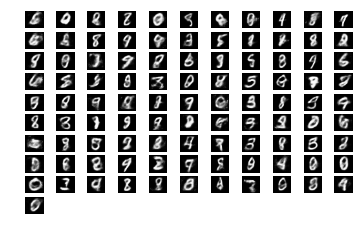

id:7


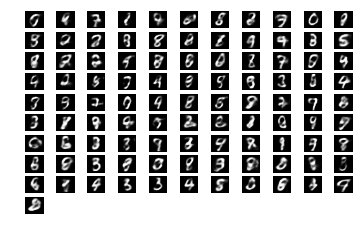

id:8


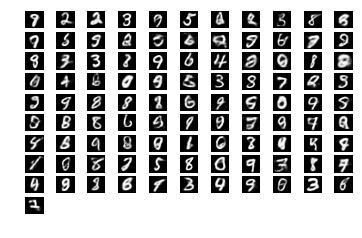

id:9


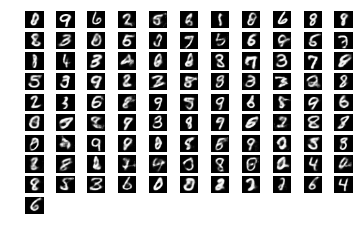

id:10


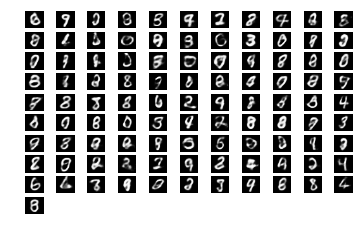

id:11


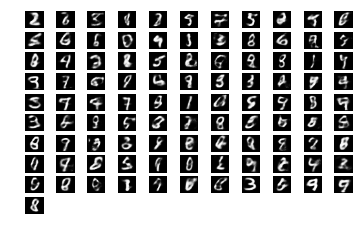

id:12


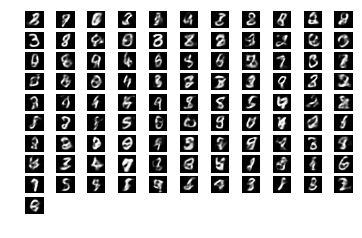

id:13


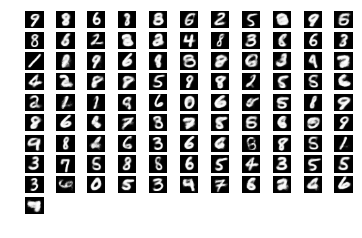

id:14


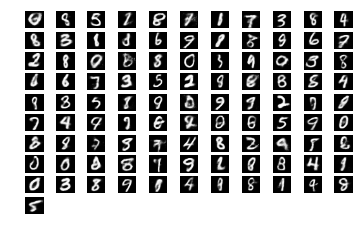

id:15


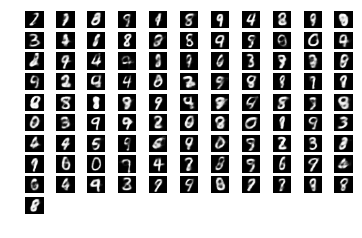

id:16


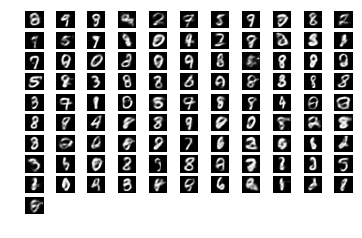

id:17


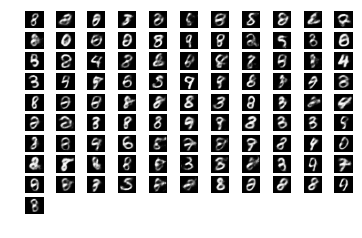

id:18


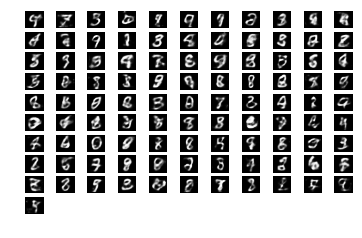

id:19


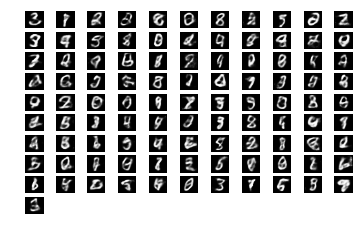

id:20


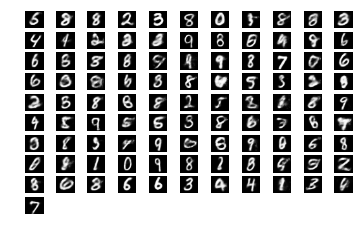

In [9]:
for i, s in enumerate(samples_all):
    print("id:{0}".format(i))
    plt.clf()
    plot_weights.grid_plot(1 - s)
    plt.show() 